<a href="https://colab.research.google.com/github/qobam/NLP/blob/main/Model_Machine_Learning_Rifky_Henry_Ferdianto_Analisis_Sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Scraping

In [94]:
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

In [95]:
import nltk  # Mengimpor pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt') # Mengunduh data 'punkt' untuk tokenisasi
nltk.download('stopwords') # Mengunduh daftar kata henti (stopwords)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rifky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rifky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
from google_play_scraper import app, reviews_all, Sort
scrapreview = reviews_all(
    "com.tencent.qqlivei18n",
    lang="id", # Mengatur bahasa ulasan ke Bahasa Indonesia
    country="id", # Mengatur negara ulasan ke Indonesia
    sort=Sort.MOST_RELEVANT, # Mengatur urutan ulasan berdasarkan yang paling relevant
    filter_score_with=None # Mengambil semua ulasan tanpa filter skor
)

In [97]:
import csv

# Menyimpan ulasan ke dalam file CSV
with open('ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom 'Review'
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

In [98]:
# Membuat DataFrame dari hasil scraping ulasan dan mengambil 20000 baris pertama
app_reviews_df = pd.DataFrame(scrapreview).head(20000)

# Menampilkan bentuk (jumlah baris dan kolom) dari DataFrame
app_reviews_df.shape

# Menampilkan lima baris pertama dari DataFrame
app_reviews_df.head()

# Menyimpan DataFrame ke dalam file CSV (opsional, bisa dihapus jika tidak perlu)
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

In [99]:
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [100]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,55530d65-3213-481e-a104-7dfc48b22e8c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,yang bikin ganggu banget tuh aplikasinya serin...,1,22,5.26.0.15930,2025-07-19 12:53:53,"Hi Kak! Mohon maaf atas kendalanya, silakan co...",2025-07-19 14:42:08,5.26.0.15930
1,98ae94de-54d2-481c-b288-fa4db5d805df,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ga ku permasalahkan sama iklannya karna gratis...,1,258,5.25.7.15900,2025-07-07 00:17:31,Hi Kak! Kakak ttp bs nonton & pilih konten FRE...,2025-07-08 00:02:35,5.25.7.15900
2,b5148a40-3f1a-438b-9557-5f0a83143d50,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kenapa masih ada iklan nya dah?? padahal udah ...,3,11,5.25.6.15850,2025-07-02 18:05:39,"Hai kak, mohon maaf atas ketidaknyamanannya. T...",2025-07-03 06:48:24,5.25.6.15850
3,96e188d4-8258-4b50-aad4-2339e945c7dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"untuk serang saya kasih bintang 3 dulu, aplika...",3,51,5.24.0.15440,2025-05-28 00:55:56,"Hai kak, mohon maaf atas kendalanya ya. WeTV t...",2025-05-28 10:16:35,5.24.0.15440
4,738bfc27-e698-4173-b64e-9fd7293803ed,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya sudah muak dengan we tv keluhan saya suda...,1,20,5.25.7.15900,2025-07-11 23:52:34,"Halo, Kak. Mohon maaf ya. Silakan dicoba clear...",2025-07-12 14:54:52,5.25.7.15900


Data Processing

In [101]:
# Menampilkan informasi tentang DataFrame app_reviews_df (tipe data, non-null count, dll.)
app_reviews_df.info()

# Menghitung jumlah nilai yang hilang (NaN) per kolom
print(app_reviews_df.isnull().sum())

# Menghitung jumlah baris yang terduplikasi dalam DataFrame
print(app_reviews_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76099 entries, 0 to 76098
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              76099 non-null  object        
 1   userName              76099 non-null  object        
 2   userImage             76099 non-null  object        
 3   content               76099 non-null  object        
 4   score                 76099 non-null  int64         
 5   thumbsUpCount         76099 non-null  int64         
 6   reviewCreatedVersion  46656 non-null  object        
 7   at                    76099 non-null  datetime64[ns]
 8   replyContent          29866 non-null  object        
 9   repliedAt             29866 non-null  datetime64[ns]
 10  appVersion            46656 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 6.4+ MB
reviewId                    0
userName                    0
userImag

In [102]:
# Menghapus kolom-kolom yang tidak relevan untuk analisis sentimen
# Keep 'score' column for later analysis
clean_df1 = app_reviews_df.drop(columns=['reviewId','userName','userImage','replyContent','repliedAt','reviewCreatedVersion','appVersion'], inplace=False)

In [103]:
# Menghapus baris yang mengandung nilai yang hilang (NaN)
clean_df2 = clean_df1.dropna(inplace=False)

In [104]:
# Menghapus baris yang terduplikasi
clean_df = clean_df2.drop_duplicates(inplace=False)

In [105]:
# Menampilkan informasi tentang DataFrame setelah pembersihan
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76099 entries, 0 to 76098
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   content        76099 non-null  object        
 1   score          76099 non-null  int64         
 2   thumbsUpCount  76099 non-null  int64         
 3   at             76099 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


In [106]:
import re
import string
from nltk.tokenize import word_tokenize

# Fungsi untuk membersihkan teks dari karakter yang tidak diinginkan
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention (@user)
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag (#hashtag)
    text = re.sub(r'RT[\s]', '', text) # menghapus "RT" (Retweet)
    text = re.sub(r"http\S+", '', text) # menghapus link (URL)
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf, angka, dan spasi

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari awal dan akhir teks
    return text

# Fungsi untuk mengubah semua karakter dalam teks menjadi huruf kecil (case folding)
def casefoldingText(text):
    text = text.lower()
    return text

# Fungsi untuk memecah teks menjadi daftar token (kata-kata)
def tokenizingText(text):
    text = word_tokenize(text)
    return text

# Fungsi untuk menggabungkan token-token menjadi kalimat
def toSentence(list_words):
    # Ensure all elements in the list are strings before joining
    sentence = ' '.join(str(word) for word in list_words)
    return sentence

In [128]:
from nlp_id.lemmatizer import Lemmatizer
from nlp_id.stopword import StopWord
from nltk.corpus import stopwords

# Initialize Lemmatizer and StopWord objects outside the functions for efficiency
lemmatizer = Lemmatizer()
stopword_remover_nlp_id = StopWord()

# Fungsi untuk melakukan stemming atau lemmatization pada teks menggunakan nlp-id
def LemmaText(list_words):
    lemmatized_words = [str(lemmatizer.lemmatize(word)) for word in list_words]
    return lemmatized_words

# Fungsi untuk menghapus kata-kata henti (stopwords) dalam teks menggunakan nlp-id and custom list
# Fungsi untuk menghapus kata-kata henti (stopwords) dalam teks
def filteringText(text):
    # Get stopwords from nlp_id
    listStopwords_nlp_id = set(stopword_remover_nlp_id.get_stopword())
    listStopwords = listStopwords_nlp_id
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy","lah"]) # Menambahkan stopwords kustom

    filtered = [] # Membuat list kosong untuk menyimpan kata-kata yang tidak termasuk stopwords
    for txt in text: # Mengulang setiap kata dalam teks
        if txt not in listStopwords: # Memeriksa apakah kata bukan stopwords
            filtered.append(txt) # Jika bukan, tambahkan ke list filtered
    text = filtered # Mengganti teks dengan kata-kata yang sudah difilter
    return text

In [129]:
# Kamus kata-kata slang dan padanannya dalam bahasa standar
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "hubla": "perhubungan laut", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai","ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista"}
# Fungsi untuk mengganti kata-kata slang dengan padanannya dalam bahasa standar
def fix_slangwords(text):
    words = text.split() # Memecah teks menjadi daftar kata
    fixed_words = [] # Membuat list kosong untuk menyimpan kata-kata yang sudah diperbaiki

    for word in words: # Mengulang setiap kata dalam daftar kata
        if word.lower() in slangwords: # Memeriksa apakah kata (dalam huruf kecil) ada dalam kamus slangwords
            fixed_words.append(slangwords[word.lower()]) # Jika ada, tambahkan padanannya ke fixed_words
        else:
            fixed_words.append(word) # Jika tidak ada, tambahkan kata aslinya ke fixed_words

    fixed_text = ' '.join(fixed_words) # Menggabungkan kata-kata yang sudah diperbaiki kembali menjadi teks
    return fixed_text

In [130]:

# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi daftar token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menambahkan langkah lemmatisasi
clean_df['text_lemmatized'] = clean_df['text_stopword'].apply(LemmaText)

clean_df['text_akhir'] = clean_df['text_lemmatized'].apply(toSentence)

In [131]:
# Menampilkan DataFrame clean_df setelah preprocessing
clean_df

,content,score,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_lemmatized,text_akhir,polarity_score,polarity,text_length
0,yang bikin ganggu banget tuh aplikasinya serin...,1,22,2025-07-19 12:53:53,yang bikin ganggu banget tuh aplikasinya serin...,yang bikin ganggu banget tuh aplikasinya serin...,yang bikin ganggu banget tuh aplikasinya serin...,"[yang, bikin, ganggu, banget, tuh, aplikasinya...","[bikin, ganggu, tuh, aplikasinya, suka, macet,...","[bikin, ganggu, tuh, aplikasi, suka, macet, ka...",bikin ganggu tuh aplikasi suka macet kayak nge...,1,positive,43
1,ga ku permasalahkan sama iklannya karna gratis...,1,258,2025-07-07 00:17:31,ga ku permasalahkan sama iklannya karna gratis...,ga ku permasalahkan sama iklannya karna gratis...,ga ku permasalahkan sama iklannya karena grati...,"[ga, ku, permasalahkan, sama, iklannya, karena...","[permasalahkan, iklannya, gratis, permasalahka...","[masalah, iklan, gratis, masalah, vidiofilm, v...",masalah iklan gratis masalah vidiofilm vip gra...,10,positive,17
2,kenapa masih ada iklan nya dah?? padahal udah ...,3,11,2025-07-02 18:05:39,kenapa masih ada iklan nya dah padahal udah la...,kenapa masih ada iklan nya dah padahal udah la...,kenapa masih ada iklan nya deh padahal udah la...,"[kenapa, masih, ada, iklan, nya, deh, padahal,...","[iklan, deh, langganan, sebentar, trus, masuk,...","[iklan, deh, langgan, sebentar, trus, masuk, a...",iklan deh langgan sebentar trus masuk apk ikla...,8,positive,23
3,"untuk serang saya kasih bintang 3 dulu, aplika...",3,51,2025-05-28 00:55:56,untuk serang saya kasih bintang dulu aplikasi...,untuk serang saya kasih bintang dulu aplikasi...,untuk serang saya kasih bintang dulu aplikasin...,"[untuk, serang, saya, kasih, bintang, dulu, ap...","[serang, kasih, bintang, aplikasinya, bagus, l...","[serang, kasih, bintang, aplikasi, bagus, luma...",serang kasih bintang aplikasi bagus lumayan ko...,-9,negative,38
4,saya sudah muak dengan we tv keluhan saya suda...,1,20,2025-07-11 23:52:34,saya sudah muak dengan we tv keluhan saya suda...,saya sudah muak dengan we tv keluhan saya suda...,saya sudah muak dengan we tv keluhan saya suda...,"[saya, sudah, muak, dengan, we, tv, keluhan, s...","[muak, we, tv, keluhan, bertahun, digubris, bu...","[muak, we, tv, keluh, tahun, gubris, bug, subt...",muak we tv keluh tahun gubris bug subtitle lam...,-4,negative,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76094,👍👍,2,0,2021-03-18 17:39:47,,,,[],[],[],,0,neutral,0
76095,👍👍,2,0,2019-10-10 20:36:12,,,,[],[],[],,0,neutral,0
76096,👍👍👍,2,0,2019-10-26 23:45:24,,,,[],[],[],,0,neutral,0
76097,🥰,2,0,2022-02-17 20:46:36,,,,[],[],[],,0,neutral,0


Data Labelling

In [132]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
# Using the raw content URL for better CSV parsing
positive_url = 'https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv'
response = requests.get(positive_url)


if response.status_code == 200:
    # Jika permintaan berhasil (kode status 200)
    # Use StringIO to treat the response text as a file
    csv_file = StringIO(response.text)
    # Using csv.reader with tab delimiter as per .tsv extension
    reader = csv.reader(csv_file, delimiter='\t') # Changed delimiter to tab

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        # Check if the row has at least two elements before accessing indices
        if len(row) >= 2:
            try:
                # Attempt to convert the score to an integer
                lexicon_positive[row[0]] = int(row[1])
                # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
            except ValueError:
                # Handle cases where the second column is not a valid integer
                pass # Removed print statement
        else:
            # Handle rows that do not have enough columns (e.g., blank lines)
            pass # Removed print statement
else:
    print(f"Gagal mengambil data kamus positif. Status code: {response.status_code}") # Pesan jika gagal mengambil data

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
# Using the raw content URL for better CSV parsing
negative_url = 'https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv'
response = requests.get(negative_url)

if response.status_code == 200:
    # Jika permintaan berhasil (kode status 200)
    # Use StringIO to treat the response text as a file
    csv_file = StringIO(response.text)
    # Using csv.reader with tab delimiter as per .tsv extension
    reader = csv.reader(csv_file, delimiter='\t') # Changed delimiter to tab

    # Skip header row if it exists (assuming the first row is a header)
    # next(reader, None) # Uncomment if there is a header row

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
         # Check if the row has at least two elements before accessing indices
        if len(row) >= 2:
            try:
                # Attempt to convert the score to an integer
                lexicon_negative[row[0]] = int(row[1])
                # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
            except ValueError:
                 # Handle cases where the second column is not a valid integer
                pass # Removed print statement
        else:
            # Handle rows that do not have enough columns (e.g., blank lines)
            pass # Removed print statement
else:
    print(f"Gagal mengambil data kamus negatif. Status code: {response.status_code}") # Pesan jika gagal mengambil data

# You can print the size of the loaded lexicons to verify
print(f"\nJumlah kata dalam kamus positif: {len(lexicon_positive)}")
print(f"Jumlah kata dalam kamus negatif: {len(lexicon_negative)}")


Jumlah kata dalam kamus positif: 3609
Jumlah kata dalam kamus negatif: 6607


In [133]:
# Fungsi untuk analisis sentimen berbasis leksikon dalam bahasa Indonesia
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks
        if (word in lexicon_positive):
            score += lexicon_positive[word]
        elif (word in lexicon_negative): # Menggunakan elif untuk menggabungkan perulangan
            score += lexicon_negative[word]

    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 0):
        polarity = 'positive' # Jika skor lebih dari 0, polaritas positif
    elif (score < 0):
        polarity = 'negative' # Jika skor kurang dari 0, polaritas negatif
    else:
        polarity = 'neutral' # Jika skor 0, polaritas netral

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [134]:
# Menerapkan fungsi analisis sentimen berbasis leksikon pada kolom 'text_stopword'
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)

# Memisahkan hasil skor dan polaritas ke dalam dua list terpisah
results = list(zip(*results))

# Menambahkan kolom 'polarity_score' dan 'polarity' ke DataFrame
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

# Menampilkan jumlah data untuk setiap kategori polaritas
print(clean_df['polarity'].value_counts())

polarity
positive    40555
neutral     20669
negative    14875
Name: count, dtype: int64


In [135]:
# Menampilkan DataFrame clean_df dengan kolom sentimen baru
display(clean_df)

,content,score,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_lemmatized,text_akhir,polarity_score,polarity,text_length
0,yang bikin ganggu banget tuh aplikasinya serin...,1,22,2025-07-19 12:53:53,yang bikin ganggu banget tuh aplikasinya serin...,yang bikin ganggu banget tuh aplikasinya serin...,yang bikin ganggu banget tuh aplikasinya serin...,"[yang, bikin, ganggu, banget, tuh, aplikasinya...","[bikin, ganggu, tuh, aplikasinya, suka, macet,...","[bikin, ganggu, tuh, aplikasi, suka, macet, ka...",bikin ganggu tuh aplikasi suka macet kayak nge...,-6,negative,43
1,ga ku permasalahkan sama iklannya karna gratis...,1,258,2025-07-07 00:17:31,ga ku permasalahkan sama iklannya karna gratis...,ga ku permasalahkan sama iklannya karna gratis...,ga ku permasalahkan sama iklannya karena grati...,"[ga, ku, permasalahkan, sama, iklannya, karena...","[permasalahkan, iklannya, gratis, permasalahka...","[masalah, iklan, gratis, masalah, vidiofilm, v...",masalah iklan gratis masalah vidiofilm vip gra...,10,positive,17
2,kenapa masih ada iklan nya dah?? padahal udah ...,3,11,2025-07-02 18:05:39,kenapa masih ada iklan nya dah padahal udah la...,kenapa masih ada iklan nya dah padahal udah la...,kenapa masih ada iklan nya deh padahal udah la...,"[kenapa, masih, ada, iklan, nya, deh, padahal,...","[iklan, deh, langganan, sebentar, trus, masuk,...","[iklan, deh, langgan, sebentar, trus, masuk, a...",iklan deh langgan sebentar trus masuk apk ikla...,2,positive,23
3,"untuk serang saya kasih bintang 3 dulu, aplika...",3,51,2025-05-28 00:55:56,untuk serang saya kasih bintang dulu aplikasi...,untuk serang saya kasih bintang dulu aplikasi...,untuk serang saya kasih bintang dulu aplikasin...,"[untuk, serang, saya, kasih, bintang, dulu, ap...","[serang, kasih, bintang, aplikasinya, bagus, l...","[serang, kasih, bintang, aplikasi, bagus, luma...",serang kasih bintang aplikasi bagus lumayan ko...,-9,negative,38
4,saya sudah muak dengan we tv keluhan saya suda...,1,20,2025-07-11 23:52:34,saya sudah muak dengan we tv keluhan saya suda...,saya sudah muak dengan we tv keluhan saya suda...,saya sudah muak dengan we tv keluhan saya suda...,"[saya, sudah, muak, dengan, we, tv, keluhan, s...","[muak, we, tv, keluhan, bertahun, digubris, bu...","[muak, we, tv, keluh, tahun, gubris, bug, subt...",muak we tv keluh tahun gubris bug subtitle lam...,-6,negative,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76094,👍👍,2,0,2021-03-18 17:39:47,,,,[],[],[],,0,neutral,0
76095,👍👍,2,0,2019-10-10 20:36:12,,,,[],[],[],,0,neutral,0
76096,👍👍👍,2,0,2019-10-26 23:45:24,,,,[],[],[],,0,neutral,0
76097,🥰,2,0,2022-02-17 20:46:36,,,,[],[],[],,0,neutral,0


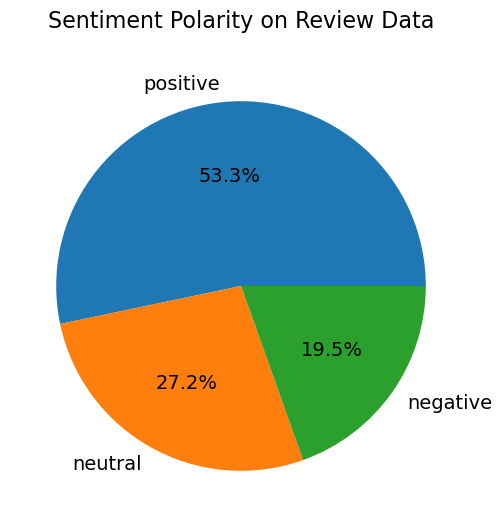

In [136]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu untuk plot pie dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
# Di sini, semua potongan tidak ditarik (explode=0).
explode = [0 if label == 'negative' else 0 for label in labels] # Disesuaikan explode agar sesuai dengan jumlah label

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie dengan satu angka di belakang koma.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

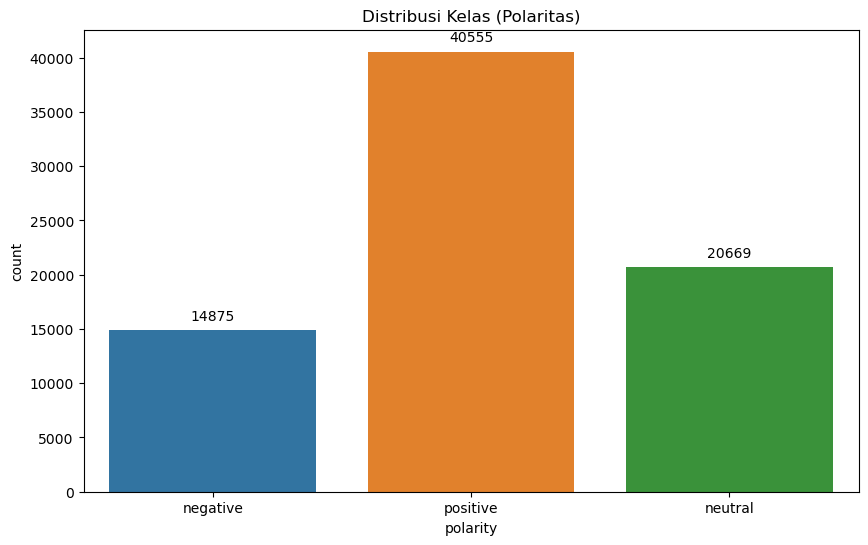

C:\Users\rifky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


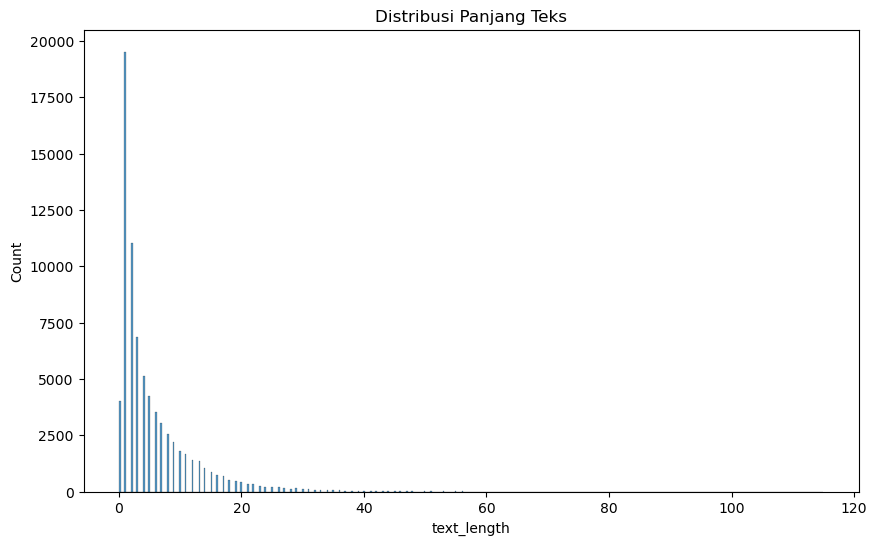

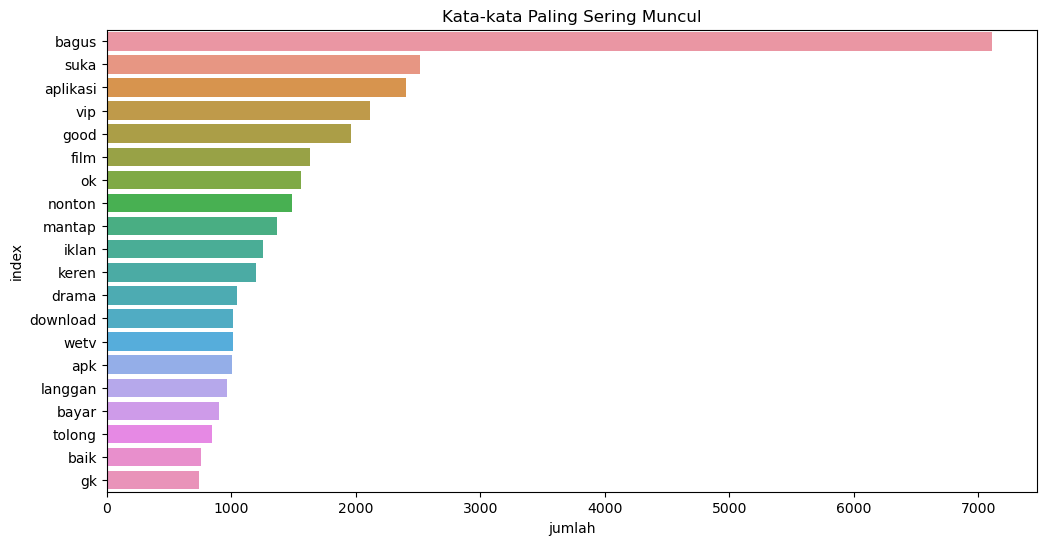

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengatur ukuran gambar untuk plot
plt.figure(figsize=(10, 6))

# Membuat plot hitungan (countplot) untuk distribusi kelas (polaritas)
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Distribusi Kelas (Polaritas)') # Judul plot

# Menambahkan jumlah di atas batang pada plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'), # Format teks sebagai bilangan bulat
                              (p.get_x() + p.get_width() / 2., p.get_height()), # Posisi teks di tengah atas batang
                              ha='center', va='center', # Penjajaran horizontal dan vertikal
                              xytext=(0, 10), # Offset teks dari titik referensi
                              textcoords='offset points') # Menggunakan offset dalam poin

plt.show() # Menampilkan plot

# Mengatur ukuran gambar untuk plot
plt.figure(figsize=(10, 6))

# Menghitung panjang teks (jumlah kata) dan menyimpannya di kolom 'text_length'
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))

# Membuat histogram untuk visualisasi distribusi panjang teks
sns.histplot(clean_df['text_length'])
plt.title('Distribusi Panjang Teks') # Judul plot
plt.show() # Menampilkan plot

# Mengatur ukuran gambar untuk plot
plt.figure(figsize=(12, 6))

# Menggunakan TfidfVectorizer untuk mendapatkan kata-kata yang paling sering muncul
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir']) # Melakukan fit dan transform pada teks akhir
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()) # Mengubah hasil TF-IDF menjadi DataFrame
tfidf_df = tfidf_df.sum().reset_index(name='jumlah') # Menjumlahkan skor TF-IDF untuk setiap kata
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20) # Mengurutkan dan mengambil 20 kata teratas

# Membuat bar plot untuk visualisasi kata-kata yang paling sering muncul
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Kata-kata Paling Sering Muncul') # Judul plot
plt.show() # Menampilkan plot

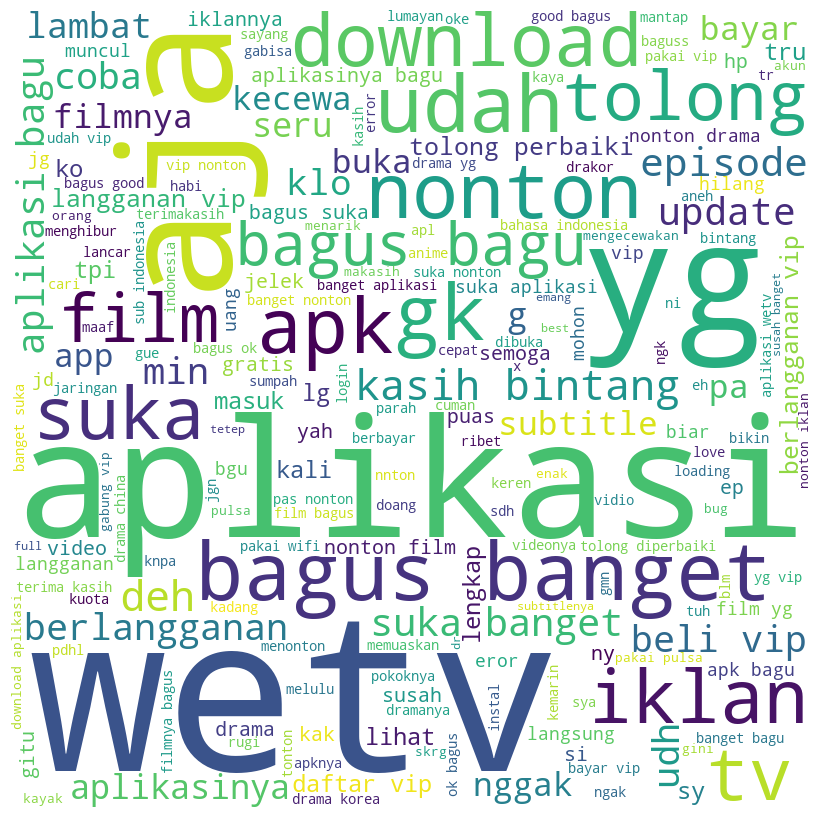

In [117]:
from wordcloud import WordCloud

# Menggabungkan semua teks di kolom 'text_stopword' menjadi satu string
all_words = ' '.join([text for text_list in clean_df['text_stopword'] for text in text_list])

# Membuat objek WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_words)

# Menampilkan WordCloud menggunakan matplotlib
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [118]:
# Memfilter ulasan dengan sentimen yang bertentangan berdasarkan ekspektasi umum
# Contoh: ulasan bintang 5 yang diklasifikasikan sebagai negatif oleh leksikon,
# atau ulasan bintang 1 yang diklasifikasikan sebagai positif.

# Kasus kontradiktif untuk diinvestigasi:
# Ulasan bintang 1 dengan sentimen 'positive'
contradictory_reviews_1_positive = clean_df[(clean_df['score'] == 1) & (clean_df['polarity'] == 'positive')]

# Ulasan bintang 2 dengan sentimen 'positive'
contradictory_reviews_2_positive = clean_df[(clean_df['score'] == 2) & (clean_df['polarity'] == 'positive')]

# Ulasan bintang 4 dengan sentimen 'negative'
contradictory_reviews_4_negative = clean_df[(clean_df['score'] == 4) & (clean_df['polarity'] == 'negative')]

# Ulasan bintang 5 dengan sentimen 'negative'
contradictory_reviews_5_negative = clean_df[(clean_df['score'] == 5) & (clean_df['polarity'] == 'negative')]


print("Contoh ulasan bintang 1 dengan sentimen Positif:")
display(contradictory_reviews_1_positive.head())

print("\nContoh ulasan bintang 2 dengan sentimen Positif:")
display(contradictory_reviews_2_positive.head())

print("\nContoh ulasan bintang 4 dengan sentimen Negatif:")
display(contradictory_reviews_4_negative.head())

print("\nContoh ulasan bintang 5 dengan sentimen Negatif:")
display(contradictory_reviews_5_negative.head())

Contoh ulasan bintang 1 dengan sentimen Positif:


,content,score,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_lemmatized,text_akhir,polarity_score,polarity,text_length
0,yang bikin ganggu banget tuh aplikasinya serin...,1,22,2025-07-19 12:53:53,yang bikin ganggu banget tuh aplikasinya serin...,yang bikin ganggu banget tuh aplikasinya serin...,yang bikin ganggu banget tuh aplikasinya serin...,"[yang, bikin, ganggu, banget, tuh, aplikasinya...","[bikin, ganggu, banget, tuh, aplikasinya, suka...","[bikin, ganggu, banget, tuh, aplikasi, suka, m...",bikin ganggu banget tuh aplikasi suka macet ka...,1,positive,43
1,ga ku permasalahkan sama iklannya karna gratis...,1,258,2025-07-07 00:17:31,ga ku permasalahkan sama iklannya karna gratis...,ga ku permasalahkan sama iklannya karna gratis...,ga ku permasalahkan sama iklannya karena grati...,"[ga, ku, permasalahkan, sama, iklannya, karena...","[permasalahkan, iklannya, gratis, permasalahka...","[masalah, iklan, gratis, masalah, vidiofilm, v...",masalah iklan gratis masalah vidiofilm vip gra...,10,positive,17
9,sudah berlangganan VIP perbulan masih aja kelu...,1,27,2025-06-03 22:04:27,sudah berlangganan VIP perbulan masih aja kelu...,sudah berlangganan vip perbulan masih aja kelu...,sudah berlangganan vip perbulan masih aja kelu...,"[sudah, berlangganan, vip, perbulan, masih, aj...","[berlangganan, vip, perbulan, aja, iklan, vip,...","[langgan, vip, bulan, aja, iklan, vip, nonton,...",langgan vip bulan aja iklan vip nonton series ...,5,positive,37
11,ini aplikasi untuk nonton film atau nonton ikl...,1,57,2025-06-25 23:34:13,ini aplikasi untuk nonton film atau nonton ikl...,ini aplikasi untuk nonton film atau nonton ikl...,ini aplikasi untuk nonton film atau nonton ikl...,"[ini, aplikasi, untuk, nonton, film, atau, non...","[aplikasi, nonton, film, nonton, iklan, banget...","[aplikasi, nonton, film, nonton, iklan, banget...",aplikasi nonton film nonton iklan banget iklan...,4,positive,15
15,"aplikasinya bagus, tontonannya favorit semua.....",1,0,2025-07-13 23:08:35,aplikasinya bagus tontonannya favorit semua ta...,aplikasinya bagus tontonannya favorit semua ta...,aplikasinya bagus tontonannya favorit semua ta...,"[aplikasinya, bagus, tontonannya, favorit, sem...","[aplikasinya, bagus, tontonannya, favorit, uda...","[aplikasi, bagus, tonton, favorit, udah, beli,...",aplikasi bagus tonton favorit udah beli paket ...,11,positive,13



Contoh ulasan bintang 2 dengan sentimen Positif:


,content,score,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_lemmatized,text_akhir,polarity_score,polarity,text_length
19,Saya ingin nonton anime mikadono sanshimai wa ...,2,0,2025-07-19 19:06:52,Saya ingin nonton anime mikadono sanshimai wa ...,saya ingin nonton anime mikadono sanshimai wa ...,saya ingin nonton anime mikadono sanshimai wa ...,"[saya, ingin, nonton, anime, mikadono, sanshim...","[nonton, anime, mikadono, sanshimai, wa, angai...","[nonton, anime, mikadono, sanshimai, wa, angai...",nonton anime mikadono sanshimai wa angai cari ...,11,positive,22
21,tolong dong untuk wetv untuk video yg udah di ...,2,8,2025-05-30 12:09:26,tolong dong untuk wetv untuk video yg udah di ...,tolong dong untuk wetv untuk video yg udah di ...,tolong dong untuk wetv untuk video yg udah di ...,"[tolong, dong, untuk, wetv, untuk, video, yg, ...","[tolong, wetv, video, yg, udah, unduh, pas, to...","[tolong, wetv, video, yg, udah, unduh, pas, to...",tolong wetv video yg udah unduh pas tonton ken...,8,positive,38
34,"bagus sih, tpi wetv kok sekarang banyak yg hrs...",2,0,2025-07-01 11:16:54,bagus sih tpi wetv kok sekarang banyak yg hrs ...,bagus sih tpi wetv kok sekarang banyak yg hrs ...,bagus sih tpi wetv kok sekarang banyak yg hrs ...,"[bagus, sih, tpi, wetv, kok, sekarang, banyak,...","[bagus, tpi, wetv, yg, hrs, vip, donghua, bngt...","[bagus, tpi, wetv, yg, hrs, vip, donghua, bngt...",bagus tpi wetv yg hrs vip donghua bngt yg hrs ...,4,positive,16
35,"habis di update malah aneh, tampilannya malah ...",2,0,2025-07-02 10:08:56,habis di update malah aneh tampilannya malah j...,habis di update malah aneh tampilannya malah j...,habis di update malah aneh tampilannya malah j...,"[habis, di, update, malah, aneh, tampilannya, ...","[habis, update, aneh, tampilannya, melebar, lo...","[habis, update, aneh, tampil, lebar, login, pa...",habis update aneh tampil lebar login pakai nom...,3,positive,30
38,ini app gimana sih padahal sudah VIP tapi tete...,2,0,2025-07-13 19:06:10,ini app gimana sih padahal sudah VIP tapi tete...,ini app gimana sih padahal sudah vip tapi tete...,ini app bagaimana sih padahal sudah vip tapi t...,"[ini, app, bagaimana, sih, padahal, sudah, vip...","[app, vip, tetep, aja, muncul, iklan, gk, nyen...","[app, vip, tetep, aja, muncul, iklan, gk, nyen...",app vip tetep aja muncul iklan gk nyentuh ikla...,9,positive,17



Contoh ulasan bintang 4 dengan sentimen Negatif:


,content,score,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_lemmatized,text_akhir,polarity_score,polarity,text_length
46,wetv....saya pelanggan vip dari 2023 sampai se...,4,0,2025-06-29 22:54:21,wetvsaya pelanggan vip dari sampai sekarang t...,wetvsaya pelanggan vip dari sampai sekarang t...,wetvsaya pelanggan vip dari sampai sekarang tp...,"[wetvsaya, pelanggan, vip, dari, sampai, sekar...","[wetvsaya, pelanggan, vip, tpi, nonton, donghu...","[wetvsaya, langgan, vip, tpi, nonton, donghua,...",wetvsaya langgan vip tpi nonton donghua masuk ...,-2,negative,20
136,"pahal udah akun VIP, tapi iklan aplikasi masih...",4,0,2025-06-24 19:55:30,pahal udah akun VIP tapi iklan aplikasi masih ...,pahal udah akun vip tapi iklan aplikasi masih ...,pahal udah akun vip tapi iklan aplikasi masih ...,"[pahal, udah, akun, vip, tapi, iklan, aplikasi...","[pahal, udah, akun, vip, iklan, aplikasi, munc...","[pahal, udah, akun, vip, iklan, aplikasi, munc...",pahal udah akun vip iklan aplikasi muncul lemp...,-5,negative,14
143,"suka nonton pake wetv jadi berlangganan, aku k...",4,24,2025-04-14 19:14:27,suka nonton pake wetv jadi berlangganan aku ka...,suka nonton pake wetv jadi berlangganan aku ka...,suka nonton pakai wetv jadi berlangganan aku k...,"[suka, nonton, pakai, wetv, jadi, berlangganan...","[suka, nonton, pakai, wetv, berlangganan, nont...","[suka, nonton, pakai, wetv, langgan, nonton, d...",suka nonton pakai wetv langgan nonton download...,-2,negative,32
231,Banyak drama bagus. Sayangnya hanya bisa bayar...,4,15,2025-03-06 15:00:19,Banyak drama bagus Sayangnya hanya bisa bayar ...,banyak drama bagus sayangnya hanya bisa bayar ...,banyak drama bagus sayangnya hanya bisa bayar ...,"[banyak, drama, bagus, sayangnya, hanya, bisa,...","[drama, bagus, sayangnya, bayar, layanan, goog...","[drama, bagus, sayang, bayar, layan, google, p...",drama bagus sayang bayar layan google play sy ...,-1,negative,32
263,"Haloo tim weTv aplikasinya baguss, gambar nya ...",4,0,2025-03-10 12:02:16,Haloo tim weTv aplikasinya baguss gambar nya j...,haloo tim wetv aplikasinya baguss gambar nya j...,haloo tim wetv aplikasinya baguss gambar nya j...,"[haloo, tim, wetv, aplikasinya, baguss, gambar...","[haloo, tim, wetv, aplikasinya, baguss, gambar...","[haloo, tim, wetv, aplikasi, baguss, gambar, j...",haloo tim wetv aplikasi baguss gambar jernih k...,-3,negative,37



Contoh ulasan bintang 5 dengan sentimen Negatif:


,content,score,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_lemmatized,text_akhir,polarity_score,polarity,text_length
72,"sejauh ini yang permasalahan vip,langsung VIP ...",5,0,2025-07-12 06:23:20,sejauh ini yang permasalahan viplangsung VIP a...,sejauh ini yang permasalahan viplangsung vip a...,sejauh ini yang permasalahan viplangsung vip a...,"[sejauh, ini, yang, permasalahan, viplangsung,...","[permasalahan, viplangsung, vip, aja, deh, rug...","[masalah, viplangsung, vip, aja, deh, rugi, tu...",masalah viplangsung vip aja deh rugi turut vip...,-5,negative,23
78,seperti nya aplikasi wetv ini makin lama makin...,5,0,2025-07-15 19:48:44,seperti nya aplikasi wetv ini makin lama makin...,seperti nya aplikasi wetv ini makin lama makin...,seperti nya aplikasi wetv ini makin lama makin...,"[seperti, nya, aplikasi, wetv, ini, makin, lam...","[aplikasi, wetv, berat, tiba², force, close, a...","[aplikasi, wetv, berat, tiba, force, close, ap...",aplikasi wetv berat tiba force close aplikasi ...,-8,negative,10
85,Aplikasinya bagus buat nonton Fiturnya juga le...,5,516,2025-03-10 22:23:13,Aplikasinya bagus buat nonton Fiturnya juga le...,aplikasinya bagus buat nonton fiturnya juga le...,aplikasinya bagus buat nonton fiturnya juga le...,"[aplikasinya, bagus, buat, nonton, fiturnya, j...","[aplikasinya, bagus, nonton, fiturnya, lengkap...","[aplikasi, bagus, nonton, fiturnya, lengkap, b...",aplikasi bagus nonton fiturnya lengkap banget ...,-1,negative,33
150,"tetap konsisten ya kak, semoga kedepannya lebi...",5,12,2025-06-07 22:31:59,tetap konsisten ya kak semoga kedepannya lebih...,tetap konsisten ya kak semoga kedepannya lebih...,tetap konsisten ya kak semoga kedepannya lebih...,"[tetap, konsisten, ya, kak, semoga, kedepannya...","[konsisten, kak, semoga, kedepannya, keren, in...","[konsisten, kak, moga, depan, keren, inovatif,...",konsisten kak moga depan keren inovatif suka b...,-2,negative,22
154,edit : tolong untuk tambahkan lebih banyak don...,5,17,2025-05-06 23:14:32,edit tolong untuk tambahkan lebih banyak dong...,edit tolong untuk tambahkan lebih banyak dong...,edit tolong untuk tambahkan lebih banyak dongh...,"[edit, tolong, untuk, tambahkan, lebih, banyak...","[edit, tolong, tambahkan, donghua, anime, chin...","[edit, tolong, tambah, donghua, anime, china, ...",edit tolong tambah donghua anime china cek ani...,-2,negative,42


Data Splitting dan Ekstraksi

In [138]:
# Function to retrieve top few number of each category from clean_df
def get_top_data(df, top_n=5000):

    # Filter for each sentiment using the encoded labels
    top_data_df_positive = df[df['polarity'] == 'positive'].head(top_n)
    top_data_df_negative = df[df['polarity'] == 'negative'].head(top_n)
    top_data_df_neutral = df[df['polarity'] == 'neutral'].head(top_n)


    # Concatenate the filtered dataframes
    top_data_df_small = pd.concat([top_data_df_positive, top_data_df_negative, top_data_df_neutral])

    # Shuffle the combined dataframe to mix the sentiment categories
    top_data_df_small = top_data_df_small.sample(frac=1, random_state=seed).reset_index(drop=True)

    return top_data_df_small

# Function call to get the top 10000 from each sentiment, using clean_df as the source
top_data_df_small = get_top_data(clean_df, top_n=10000)

# After selecting top few samples of each sentiment
print("After segregating and taking equal number of rows for each sentiment:")
# Display the value counts of the 'polarity' column in the balanced subset
print(top_data_df_small['polarity'].value_counts())
# Display the first few rows of the balanced subset
display(top_data_df_small.head(10))

After segregating and taking equal number of rows for each sentiment:
polarity
positive    10000
negative    10000
neutral     10000
Name: count, dtype: int64


,content,score,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_lemmatized,text_akhir,polarity_score,polarity,text_length
0,Byk pabayarnya jd bingug🤔flmx jg ndk bs di put...,1,0,2022-01-13 02:26:13,Byk pabayarnya jd bingugflmx jg ndk bs di puta...,byk pabayarnya jd bingugflmx jg ndk bs di puta...,banyak pabayarnya jd bingugflmx jg ndk bisa di...,"[banyak, pabayarnya, jd, bingugflmx, jg, ndk, ...","[pabayarnya, jd, bingugflmx, jg, ndk, putar, m...","[pabayarnya, jd, bingugflmx, jg, ndk, putar, m...",pabayarnya jd bingugflmx jg ndk putar meskin u...,4,positive,12
1,Koneksi bagus tapi film terus tejeda berenti k...,2,0,2020-05-23 23:24:44,Koneksi bagus tapi film terus tejeda berenti k...,koneksi bagus tapi film terus tejeda berenti k...,koneksi bagus tapi film terus tejeda berenti k...,"[koneksi, bagus, tapi, film, terus, tejeda, be...","[koneksi, bagus, film, tejeda, berenti, kesel,...","[koneksi, bagus, film, tejeda, renti, kesel, n...",koneksi bagus film tejeda renti kesel nontonny...,-5,negative,17
2,tidak ada terjemahan bahasa Indonesia nya jadi...,1,0,2019-08-13 07:46:48,tidak ada terjemahan bahasa Indonesia nya jadi...,tidak ada terjemahan bahasa indonesia nya jadi...,tidak ada terjemahan bahasa indonesia nya jadi...,"[tidak, ada, terjemahan, bahasa, indonesia, ny...","[terjemahan, bahasa, indonesia, seru]","[terjemah, bahasa, indonesia, seru]",terjemah bahasa indonesia seru,4,positive,4
3,Sukak aja apa sukak banget? You know lahhh🙃,5,0,2020-12-21 11:23:35,Sukak aja apa sukak banget You know lahhh,sukak aja apa sukak banget you know lahhh,sukak aja apa sukak banget you know lahhh,"[sukak, aja, apa, sukak, banget, you, know, la...","[sukak, sukak, you, know, lahhh]","[sukak, sukak, you, know, lahhh]",sukak sukak you know lahhh,0,neutral,5
4,Bagus.. tapi kok lama2 malah gak bisa di tonto...,3,1,2021-02-06 17:09:59,Bagus tapi kok lama malah gak bisa di tonton f...,bagus tapi kok lama malah gak bisa di tonton f...,bagus tapi kok lama malah gak bisa di tonton f...,"[bagus, tapi, kok, lama, malah, gak, bisa, di,...","[bagus, tonton, filmnya, nggak, vip, filmnya, ...","[bagus, tonton, film, nggak, vip, film, jaring...",bagus tonton film nggak vip film jaring bagus,4,positive,8
5,"Ini gk bisa di tonton, buat kalian jgn di down...",1,5,2021-04-04 08:04:18,Ini gk bisa di tonton buat kalian jgn di downl...,ini gk bisa di tonton buat kalian jgn di downl...,ini gk bisa di tonton buat kalian jgn di downl...,"[ini, gk, bisa, di, tonton, buat, kalian, jgn,...","[gk, tonton, jgn, download, asli, parah, bnget...","[gk, tonton, jgn, download, asli, parah, bnget...",gk tonton jgn download asli parah bnget sudh d...,-6,negative,12
6,Apknya tolong di fix kan udah berlangganan mas...,1,0,2024-10-03 00:17:21,Apknya tolong di fix kan udah berlangganan mas...,apknya tolong di fix kan udah berlangganan mas...,apknya tolong di fix kan udah berlangganan mas...,"[apknya, tolong, di, fix, kan, udah, berlangga...","[apknya, tolong, fix, berlangganan, muncul, ik...","[apknya, tolong, fix, langgan, muncul, iklan, ...",apknya tolong fix langgan muncul iklan subtitl...,14,positive,19
7,Lumayan tp jaringan ngelek terus padahal WiFi ...,3,1,2020-06-26 20:11:10,Lumayan tp jaringan ngelek terus padahal WiFi ...,lumayan tp jaringan ngelek terus padahal wifi ...,lumayan tapi jaringan ngelek terus padahal wif...,"[lumayan, tapi, jaringan, ngelek, terus, padah...","[lumayan, jaringan, ngelek, wifi, bagus, full,...","[lumayan, jaring, ngelek, wifi, bagus, full, m...",lumayan jaring ngelek wifi bagus full msh lamb...,13,positive,15
8,Buka videonya lambat bgt padahal jaringanku ba...,2,0,2020-12-19 21:12:35,Buka videonya lambat bgt padahal jaringanku ba...,buka videonya lambat bgt padahal jaringanku ba...,buka videonya lambat banget padahal jaringanku...,"[buka, videonya, lambat, banget, padahal, jari...","[buka, videonya, lambat, jaringanku, bagus, ko...","[buka, video, lambat, jaring, bagus, koutanya,...",buka vi

In [139]:
from sklearn.model_selection import train_test_split
# Train Test Split Function
def split_train_test(top_data_df_small, test_size=0.3, shuffle_state=True):
    # Correct column names to match top_data_df_small
    X_train, X_test, Y_train, Y_test = train_test_split(top_data_df_small[['text_akhir']],
                                                        top_data_df_small['polarity'],
                                                        shuffle=shuffle_state,
                                                        test_size=test_size,
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index(drop=True) # Add drop=True to avoid keeping the old index
    X_test = X_test.reset_index(drop=True) # Add drop=True to avoid keeping the old index
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index(drop=True) # Add drop=True to avoid keeping the old index
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index(drop=True) # Add drop=True to avoid keeping the old index
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train_split, X_test_split, Y_train_split, Y_test_split = split_train_test(top_data_df_small)

Value counts for Train sentiments
polarity
positive    7050
negative    7007
neutral     6943
Name: count, dtype: int64
Value counts for Test sentiments
polarity
neutral     3057
negative    2993
positive    2950
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
                                          text_akhir
0  min ngelag buka aplikasi ngelag buka wetv ngel...
1                                vidio film mandarin
2  fix app buruk download klo g nyesel g sesuai i...
3                                   gk baikgk dehhhh
4  saldo dana potong langgan aplikasi akses aplik...


In [140]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

In [141]:
X=top_data_df_small['text_akhir']
y=top_data_df_small['polarity']

In [142]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=1000, min_df=10, max_df=0.7,ngram_range=(1, 1))
X_tfidf = tfidf.fit_transform(X)
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df


,acara,adain,adegan,admin,aduh,ah,ajaa,ajah,ajar,ajg,...,wtv,yaaa,yah,yahh,yh,yng,you,your,youtube,yt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.416531,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


Variasi 1
Logistic Regression + TF-IDF + 0.2

In [143]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.853
Logistic Regression - accuracy_test: 0.8291666666666667


Variasi 2
Random Forest + TF-IDF + 0.3

In [144]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9955238095238095
Random Forest - accuracy_test: 0.7858888888888889


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru menggunakan fungsi yang sudah didefinisikan
kalimat_baru_cleaned = cleaningText(kalimat_baru) # Membersihkan teks
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned) # Mengubah ke huruf kecil
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded) # Mengganti kata slang
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed) # Melakukan tokenisasi
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized) # Menghapus stopwords
kalimat_baru_lemmatized = LemmaText(kalimat_baru_filtered) # Mengubah menjadi bentuk kata dasar
kalimat_baru_final = toSentence(kalimat_baru_lemmatized) # Menggabungkan token menjadi kalimat

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya pada data full untuk mengubah kalimat baru menjadi fitur TF-IDF
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Mendapatkan prediksi sentimen kalimat baru menggunakan model terbaik (best_model from GridSearchCV)
# Ensure best_model is available and trained on the full data
if 'best_model' in locals():
    prediksi_sentimen_encoded = best_model.predict(X_kalimat_baru)

    # Mendapatkan probabilitas prediksi untuk setiap kelas
    prediksi_proba = best_model.predict_proba(X_kalimat_baru)

    # Mengubah kembali prediksi dari encoded label (angka) ke label asli (string: positive, negative, neutral)
    prediksi_sentimen_label = label_encoder.inverse_transform(prediksi_sentimen_encoded)

    # Menampilkan hasil prediksi berdasarkan label asli
    print(f"Sentimen kalimat baru adalah: {prediksi_sentimen_label[0].upper()}")

    # Menampilkan probabilitas untuk setiap kelas
    # The order of probabilities corresponds to the order of classes in label_encoder.classes_
    print("\nProbabilitas per kelas:")
    for i, class_label in enumerate(label_encoder.classes_):
        print(f"  {class_label.capitalize()}: {prediksi_proba[0][i]:.4f}")
else:
    print("Model terbaik (best_model) belum dilatih. Jalankan sel GridSearchCV terlebih dahulu.")

Masukkan kalimat baru: jelek


AttributeError: 'csr_matrix' object has no attribute 'lower'